# Explore here

In [66]:
import pandas as pd

df = pd.read_csv('/workspaces/Unsupervised-learning/data/raw/housing.csv')
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [67]:
df = df.drop(['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal'], axis=1)
df

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25
...,...,...,...
20635,1.5603,39.48,-121.09
20636,2.5568,39.49,-121.21
20637,1.7000,39.43,-121.22
20638,1.8672,39.43,-121.32


In [68]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df,test_size = 0.2, random_state = 42)
train

,MedInc,Latitude,Longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48
14265,1.9425,32.69,-117.11
2271,3.5542,36.78,-119.80
...,...,...,...
11284,6.3700,33.78,-117.96
11964,3.0500,34.02,-117.43
5390,2.9344,34.03,-118.38
860,5.7192,37.58,-121.96


In [69]:
test

,MedInc,Latitude,Longitude
20046,1.6812,36.06,-119.01
3024,2.5313,35.14,-119.46
15663,3.4801,37.80,-122.44
20484,5.7376,34.28,-118.72
9814,3.7250,36.62,-121.93
...,...,...,...
15362,4.6050,33.36,-117.22
16623,2.7266,35.36,-120.83
18086,9.2298,37.31,-122.05
2144,2.7850,36.77,-119.76


In [70]:
import numpy as np
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 6, random_state = 42)
model.fit(train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6, random_state=42)

In [71]:

df['cluster'] = model.fit_predict(df)
df


/home/vscode/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,MedInc,Latitude,Longitude,cluster
0,8.3252,37.88,-122.23,5
1,8.3014,37.86,-122.22,5
2,7.2574,37.85,-122.24,5
3,5.6431,37.85,-122.25,5
4,3.8462,37.85,-122.25,0
...,...,...,...,...
20635,1.5603,39.48,-121.09,0
20636,2.5568,39.49,-121.21,0
20637,1.7000,39.43,-121.22,0
20638,1.8672,39.43,-121.32,0


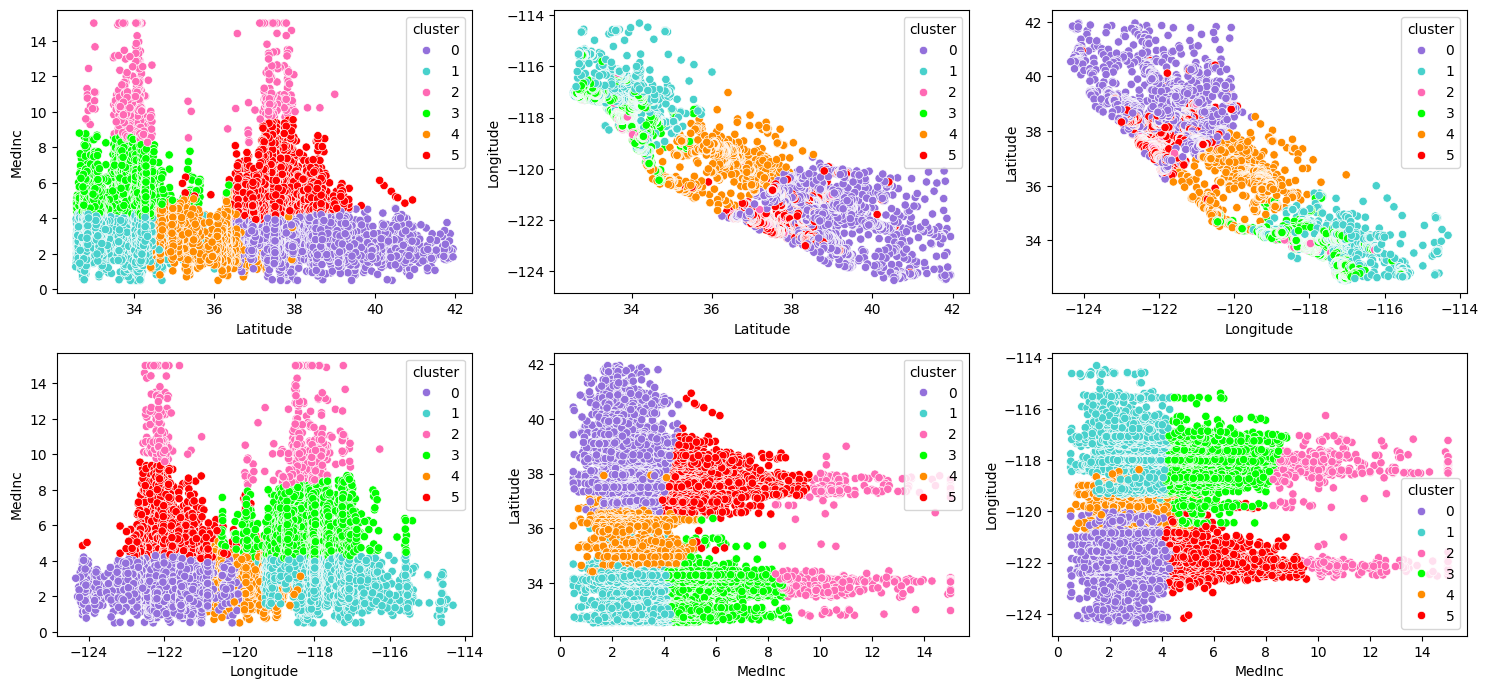

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize = (15, 7))

palette = ["mediumpurple", "mediumturquoise", "hotpink", 'lime', 'darkorange', 'red']
sns.scatterplot(ax = axis[0, 0], data = df, x = "Latitude", y = "MedInc", hue = "cluster", palette = palette)
sns.scatterplot(ax = axis[0, 1], data = df, x = "Latitude", y = "Longitude", hue = "cluster", palette = palette)
sns.scatterplot(ax = axis[0, 2], data = df, x = "Longitude", y = "Latitude", hue = "cluster", palette = palette)
sns.scatterplot(ax = axis[1, 0], data = df, x = "Longitude", y = "MedInc", hue = "cluster", palette = palette)
sns.scatterplot(ax = axis[1, 1], data = df, x = "MedInc", y = "Latitude", hue = "cluster", palette = palette)
sns.scatterplot(ax = axis[1, 2], data = df, x = "MedInc", y = "Longitude", hue = "cluster", palette = palette)

plt.tight_layout()


In [73]:
train['cluster'] = model.fit_predict(train)
train

/home/vscode/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,2
8267,3.8125,33.77,-118.16,2
17445,4.1563,34.66,-120.48,0
14265,1.9425,32.69,-117.11,2
2271,3.5542,36.78,-119.80,0
...,...,...,...,...
11284,6.3700,33.78,-117.96,3
11964,3.0500,34.02,-117.43,2
5390,2.9344,34.03,-118.38,2
860,5.7192,37.58,-121.96,5


In [74]:
test['cluster'] = model.predict(test)
test

,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,0
3024,2.5313,35.14,-119.46,0
15663,3.4801,37.80,-122.44,4
20484,5.7376,34.28,-118.72,3
9814,3.7250,36.62,-121.93,4
...,...,...,...,...
15362,4.6050,33.36,-117.22,3
16623,2.7266,35.36,-120.83,0
18086,9.2298,37.31,-122.05,5
2144,2.7850,36.77,-119.76,0


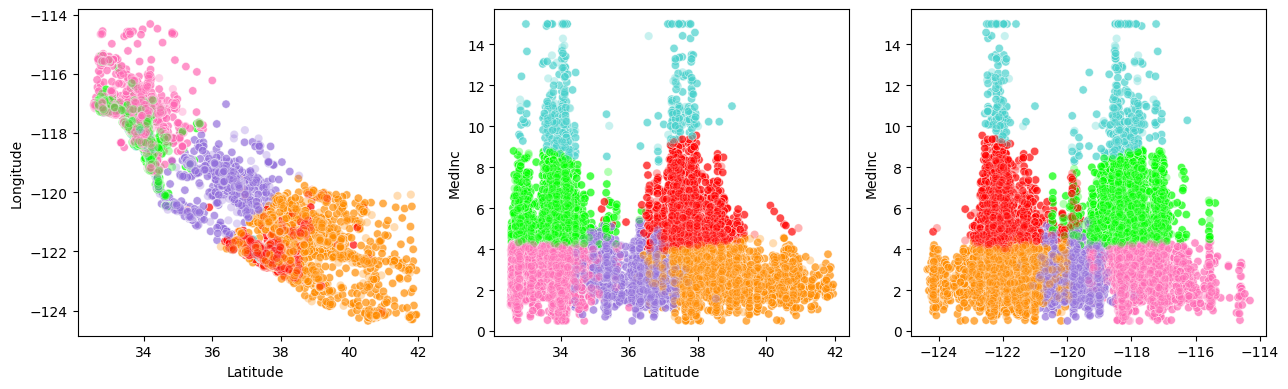

In [78]:


fig, axis = plt.subplots(1, 3, figsize=(13, 4))

# Plot the data
palette = ["mediumpurple", "mediumturquoise", "hotpink", 'lime', 'darkorange', 'red']

sns.scatterplot(ax=axis[0], data=train, x='Latitude', y='Longitude', hue='cluster', palette=palette, alpha=0.7, legend=False)
sns.scatterplot(ax=axis[1], data=train, x='Latitude', y='MedInc', hue='cluster', palette=palette, alpha=0.7, legend=False)
sns.scatterplot(ax=axis[2], data=train, x='Longitude', y='MedInc', hue='cluster', palette=palette, alpha=0.7, legend=False)

sns.scatterplot(ax=axis[0], data=test, x='Latitude', y='Longitude', hue='cluster', palette=palette, alpha=0.3, legend=False)
sns.scatterplot(ax=axis[1], data=test, x='Latitude', y='MedInc', hue='cluster', palette=palette, alpha=0.3, legend=False)
sns.scatterplot(ax=axis[2], data=test, x='Longitude', y='MedInc', hue='cluster', palette=palette, alpha=0.3, legend=False)

# Adjust Layout
plt.tight_layout()

# Plot the Data
plt.show()

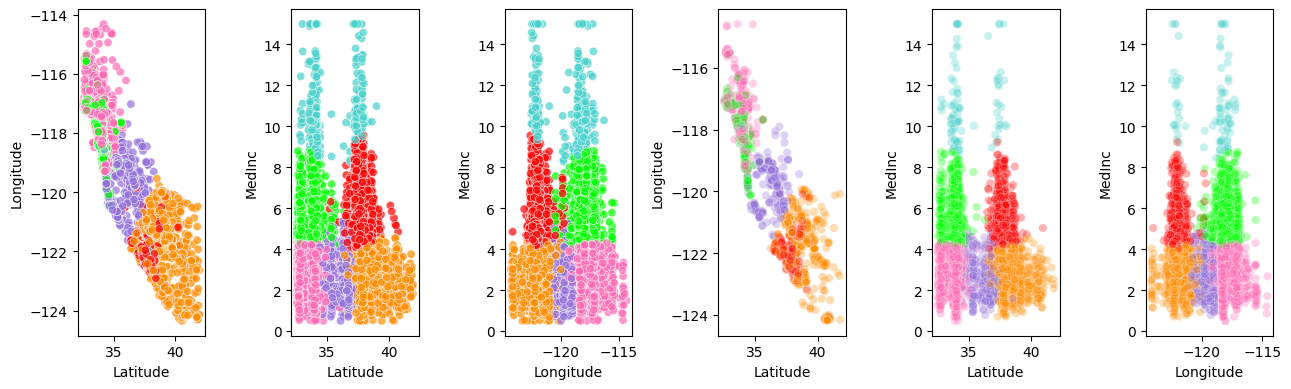

In [79]:


fig, axis = plt.subplots(1, 6, figsize=(13, 4))

# Plot the data
palette = ["mediumpurple", "mediumturquoise", "hotpink", 'lime', 'darkorange', 'red']

sns.scatterplot(ax=axis[0], data=train, x='Latitude', y='Longitude', hue='cluster', palette=palette, alpha=0.7, legend=False)
sns.scatterplot(ax=axis[1], data=train, x='Latitude', y='MedInc', hue='cluster', palette=palette, alpha=0.7, legend=False)
sns.scatterplot(ax=axis[2], data=train, x='Longitude', y='MedInc', hue='cluster', palette=palette, alpha=0.7, legend=False)

sns.scatterplot(ax=axis[3], data=test, x='Latitude', y='Longitude', hue='cluster', palette=palette, alpha=0.3, legend=False)
sns.scatterplot(ax=axis[4], data=test, x='Latitude', y='MedInc', hue='cluster', palette=palette, alpha=0.3, legend=False)
sns.scatterplot(ax=axis[5], data=test, x='Longitude', y='MedInc', hue='cluster', palette=palette, alpha=0.3, legend=False)

# Adjust Layout
plt.tight_layout()

# Plot the Data
plt.show()

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Calcular la matriz de similitud entre clusters
Z = linkage(train, method = "complete")

# Mostrar el dendrograma
plt.figure(figsize = (10, 6))

dendrogram(Z)

plt.title("Dendrograma")
plt.xlabel("Índices de datos")
plt.ylabel("Distancia")
plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(train)
